In [10]:
from sklearn.decomposition import KernelPCA
from sklearn.cross_validation import KFold
from sklearn import svm
import numpy as np
import random
import pandas as pd
import math
from sklearn.metrics import confusion_matrix as CM
import random
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.decomposition import PCA
%matplotlib inline
from matplotlib import pyplot as plt

In [11]:
def crossValidation_forest(x,y):
    """
    version 3
    
    """
    crossErrors=[]
    #confusion_matrix=[]

    rf=RFC(n_estimators=100,max_features=None)
    kf = KFold(x.shape[0], n_folds=3,shuffle=True)
    for train,test in kf:
        rf.fit(x.ix[train],y[train])
        prediction=rf.predict(x.ix[test])
        crossErrors.append(((prediction!=y[test]).sum())/float(len(y[test])))
        #confusion_matrix.append(CM(y[test],prediction))
    return np.mean(crossErrors)#,confusion_matrix

In [12]:
def layer_rbf(x,y):
    """version 2"""
    gammalist=[]
    gammalist.append(None)
    for _ in xrange(5):
        gammalist.append(random.uniform(0.1, 10))
    print len(gammalist)
    xT=[]
    xT.append(x)
    for i in xrange(len(gammalist)):
        kpca=KernelPCA(kernel='rbf',gamma=gammalist[i],n_components=x.shape[1])
        xT.append(pd.DataFrame(kpca.fit_transform(x)))
    
    #xT=pd.concat((x,x_kpca),axis=1)
    totalCrossErrors=[]
    for i in xrange(len(gammalist)+1):
        totalCrossErrors.append(crossValidation_forest(xT[i],y))

    choice=totalCrossErrors.index(sorted(totalCrossErrors)[0])

    
    
    return xT[choice],totalCrossErrors,choice

In [13]:
gl=[]
gl.append(None)
print gl
a=[None]
a==gl

[None]


True

In [14]:
def plotErr(err):
    x=range(len(err))
    #y=[e/min(err) for e in err]
    plt.bar(x,err)
    plt.title('Error Bar_Chart')
    plt.show()

In [15]:
# from sklearn.datasets import load_iris
# iris=load_iris()
# x=pd.DataFrame(iris.data)
# y=iris.target
# print type(y)

In [35]:
path=r"C:\Users\zc\Documents\MNIST data\train.csv"
mnist=pd.read_csv(path,sep=",")
#print mnist.columns
y=mnist['label']
print mnist.shape
x=mnist.drop('label',axis=1)
print type(y)
print type(x)
y=np.array(y, dtype=pd.Series)
print type(y)

(42000, 785)
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


In [36]:
sample=random.sample(range(x.shape[0]),1000)
#print sample
x=x.loc[sample]
y=y[sample]
print x.shape
print y.shape

(1000, 784)
(1000L,)


In [38]:
pca = PCA(n_components=x.shape[1])
pca.fit(x)
print(sum(pca.explained_variance_ratio_))


1.0


In [39]:
explainedRatio=[]
explained=0
for i in pca.explained_variance_ratio_:
    explained+=i
    explainedRatio.append(explained)

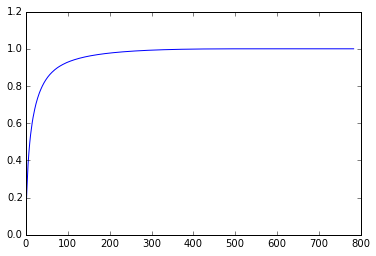

In [40]:
index=range(len(explainedRatio))
from matplotlib import pyplot as plt
plt.plot(index,explainedRatio)
plt.show()

In [41]:
for i in range(len(explainedRatio)):
    if explainedRatio[i]>0.95:
        break
print i

130


In [42]:
pca = PCA(n_components=i)
x_c=pca.fit_transform(x)

In [43]:
resultlist,errorlist,choices=[],[],[]
x=pd.DataFrame(x_c)
for i in range(30):
    print "layer:", i
    print x.shape
    result,error,choice=layer_rbf(x,y)
    x=result
    resultlist.append(result)
    errorlist.append(error)
    choices.append(choice)

layer: 0
(1000, 130)
6
layer: 1
(1000, 130)
6
layer: 2
(1000, 130)
6
layer: 3
(1000, 130)
6
layer: 4
(1000, 130)
6
layer: 5
(1000, 130)
6
layer: 6
(1000, 130)
6
layer: 7
(1000, 130)
6
layer: 8
(1000, 130)
6
layer: 9
(1000, 130)
6
layer: 10
(1000, 130)
6
layer: 11
(1000, 130)
6
layer: 12
(1000, 130)
6
layer: 13
(1000, 130)
6
layer: 14
(1000, 130)
6
layer: 15
(1000, 130)
6
layer: 16
(1000, 130)
6
layer: 17
(1000, 130)
6
layer: 18
(1000, 130)
6


KeyboardInterrupt: 

layer: 0


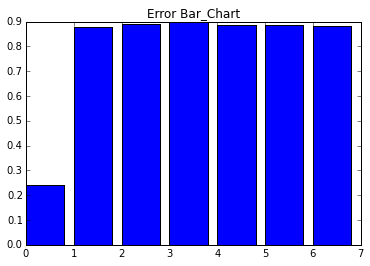

layer: 0 choose: 0
layer: 1


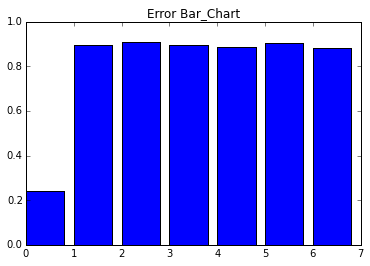

layer: 1 choose: 0
layer: 2


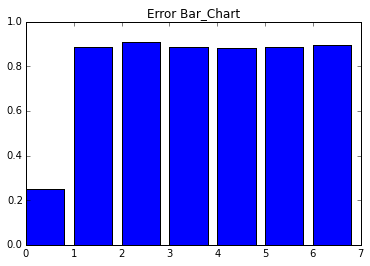

layer: 2 choose: 0
layer: 3


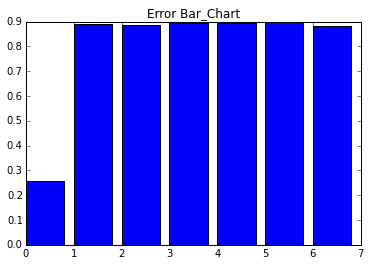

layer: 3 choose: 0
layer: 4


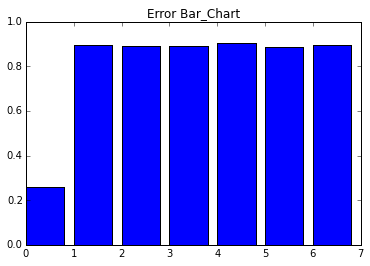

layer: 4 choose: 0
layer: 5


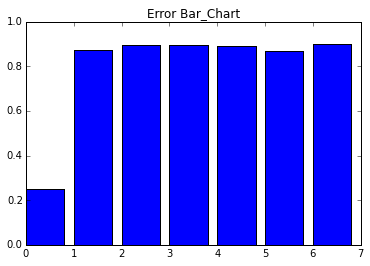

layer: 5 choose: 0
layer: 6


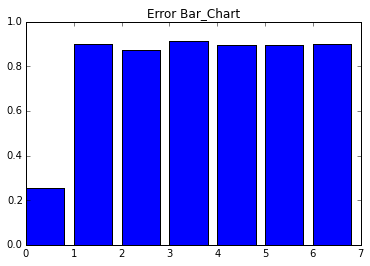

layer: 6 choose: 0
layer: 7


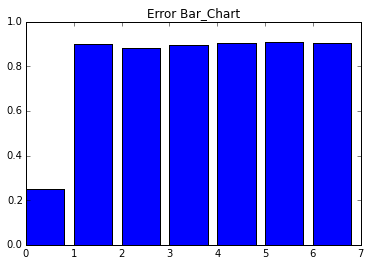

layer: 7 choose: 0
layer: 8


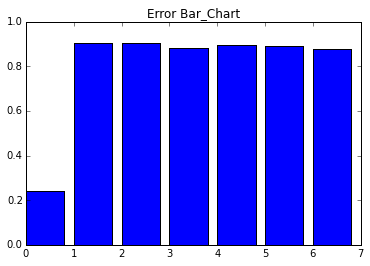

layer: 8 choose: 0
layer: 9


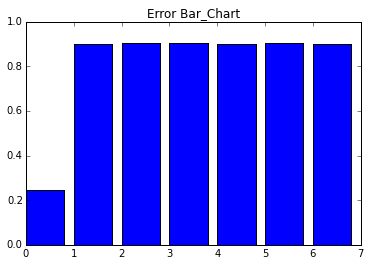

layer: 9 choose: 0
layer: 10


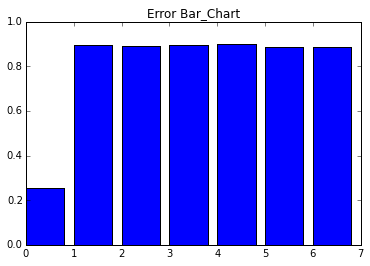

layer: 10 choose: 0
layer: 11


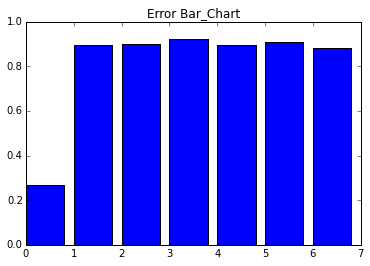

layer: 11 choose: 0
layer: 12


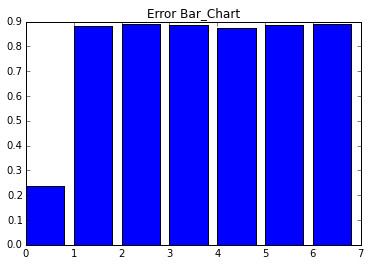

layer: 12 choose: 0
layer: 13


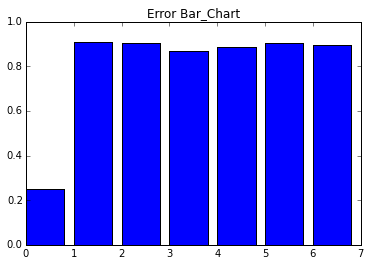

layer: 13 choose: 0
layer: 14


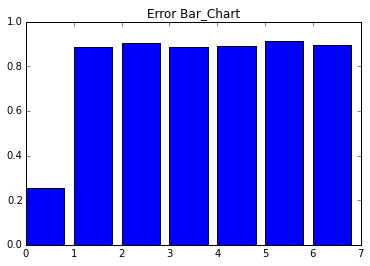

layer: 14 choose: 0
layer: 15


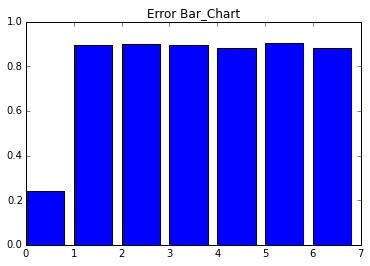

layer: 15 choose: 0
layer: 16


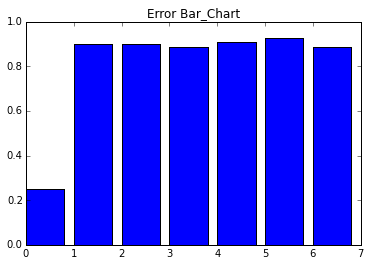

layer: 16 choose: 0
layer: 17


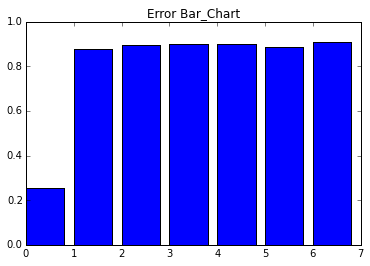

layer: 17 choose: 0


In [44]:
for i in range(len(errorlist)):
    print "layer:",i
    plotErr(errorlist[i])
    print "layer:",i,"choose:",choices[i]